In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA

In [2]:
# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

In [3]:
# Load the MNIST dataset (assuming the data is in CSV format)
mnist_data = pd.read_csv('mnist_784.csv')

In [4]:
# Print the column names to check for the correct label column
print(mnist_data.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)


In [5]:
# Split into features and labels (adjust the label column name if necessary)
# Assuming the label column is named 'class' or something else
df_data = mnist_data.drop(columns=[mnist_data.columns[-1]])  # Drop the last column (assuming it's the label)
df_labels = mnist_data[mnist_data.columns[-1]]  # The label is the last column

In [6]:
# Normalize the pixel values to range [0, 1]
df_data = df_data / 255.0

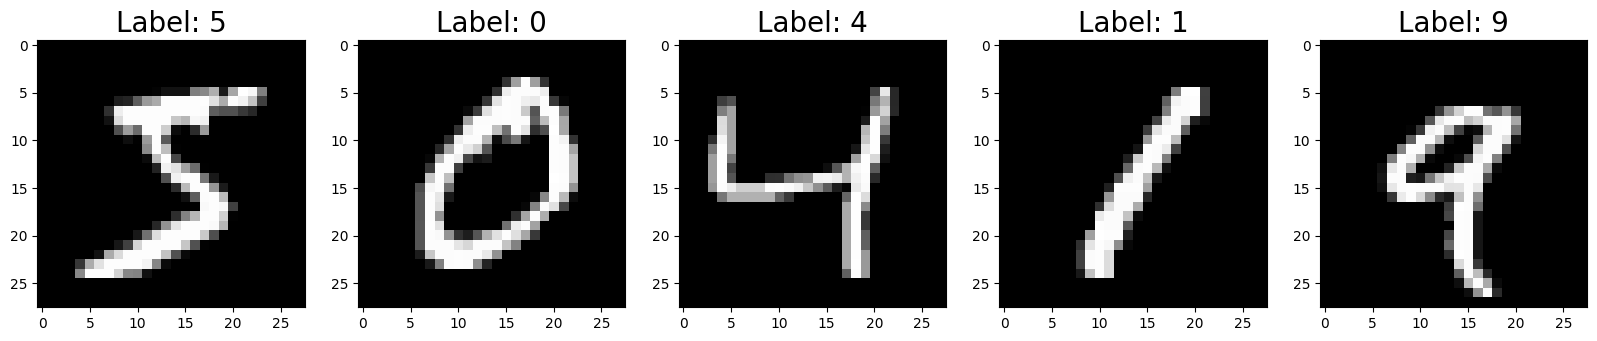

In [7]:
# Display sample images with labels
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(df_data.iloc[:5].values, df_labels.iloc[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    plt.title(f"Label: {label}", fontsize=20)
plt.show()

In [8]:
# Extract a subset of the data for faster processing
df_data_subset = df_data.iloc[:20000].copy()
df_labels_subset = df_labels.iloc[:20000].copy()

In [9]:
# Split the dataset into training and testing sets
train_image, test_image, train_label, test_label = train_test_split(
    df_data_subset, df_labels_subset, test_size=0.3, random_state=0
)

In [10]:
# Logistic Regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')

In [11]:
# Fit the model on the training data
logreg.fit(train_image, train_label)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [12]:
# Test prediction
sample_index = 0
print(f"True label: {test_label.iloc[sample_index]}")
predicted_label = logreg.predict(test_image.iloc[sample_index].values.reshape(1, -1))
print(f"Predicted label: {predicted_label[0]}")

True label: 6
Predicted label: 6


In [13]:
# Calculate accuracy
accuracy = logreg.score(test_image, test_label)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9127


Add PCA to Reduce Dimensions(Principal Component Analysis)

In [14]:
# Reduce to 100 principal components
pca = PCA(n_components=100)
df_data_pca = pca.fit_transform(df_data)

# Split the dataset after PCA transformation
df_data_subset = df_data_pca[:20000]
train_image, test_image, train_label, test_label = train_test_split(
    df_data_subset, df_labels[:20000], test_size=0.3, random_state=0
)


Compare Original vs Transformed Data Shape

In [15]:
print("Original Data Shape:", df_data.shape)  # Before PCA
print("Transformed Data Shape:", df_data_pca.shape)  # After PCA


Original Data Shape: (70000, 784)
Transformed Data Shape: (70000, 100)


Check Explained Variance Ratio

In [16]:
print("Explained Variance Ratio (First 10 Components):", pca.explained_variance_ratio_[:10])
print("Total Variance Retained:", np.sum(pca.explained_variance_ratio_))


Explained Variance Ratio (First 10 Components): [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214 ]
Total Variance Retained: 0.9149666084974454


Visualize Information Loss

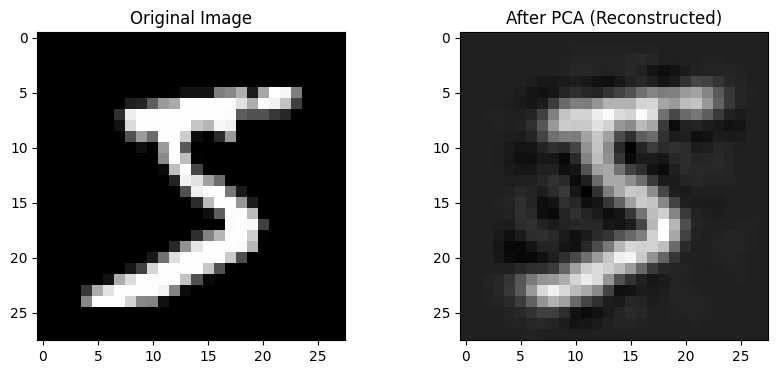

In [17]:
# Reconstruct an image from PCA-transformed data
approx_image = pca.inverse_transform(df_data_pca[0]).reshape(28, 28)

plt.figure(figsize=(10, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(df_data.iloc[0].values.reshape(28, 28), cmap='gray')
plt.title("Original Image")

# PCA Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(approx_image, cmap='gray')
plt.title("After PCA (Reconstructed)")

plt.show()


In [18]:
pca = PCA(n_components=150)  # Try increasing to 150 or 200
df_data_pca = pca.fit_transform(df_data)


Increase the Number of PCA Components

In [19]:
print(f"Total Variance Retained: {np.sum(pca.explained_variance_ratio_)}")


Total Variance Retained: 0.9485159606806286


Visualize the Impact of Different PCA Values

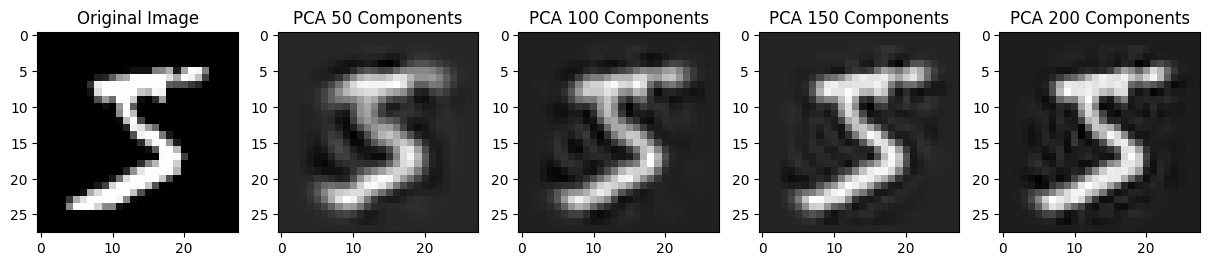

In [20]:
components_list = [50, 100, 150, 200]
fig, axes = plt.subplots(1, len(components_list) + 1, figsize=(15, 5))

# Original Image
axes[0].imshow(df_data.iloc[0].values.reshape(28, 28), cmap='gray')
axes[0].set_title("Original Image")

# PCA Transformed and Reconstructed Images
for i, comp in enumerate(components_list):
    pca = PCA(n_components=comp)
    df_data_pca = pca.fit_transform(df_data)
    approx_image = pca.inverse_transform(df_data_pca[0]).reshape(28, 28)
    
    axes[i + 1].imshow(approx_image, cmap='gray')
    axes[i + 1].set_title(f"PCA {comp} Components")

plt.show()


Incremental PCA (for large datasets)

In [22]:
pca = IncrementalPCA(n_components=150, batch_size=500)  # Process in small batches
df_data_pca = pca.fit_transform(df_data)

Kernel PCA (for better non-linear separation)

Check Classification Performance Before & After PCA

In [24]:
logreg_original = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg_original.fit(train_image, train_label)

logreg_pca = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg_pca.fit(train_image, train_label)

print("Accuracy Before PCA:", logreg_original.score(test_image, test_label))
print("Accuracy After PCA:", logreg_pca.score(test_image, test_label))


Accuracy Before PCA: 0.9193333333333333
Accuracy After PCA: 0.9193333333333333
